In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib.cm as cm
import numpy as np



In [2]:
df1 = pd.read_csv("PrivacyPolicies_df_all_nona_linkcount.csv") # reading in link lists

for index, row in df1.iterrows():
    if type(df1.at[index, "all_links"]) == float:
        df1.at[index, 'all_links'] = [df1.at[index, "all_links"]]
    elif type(df1.at[index, "all_links"]) == str:
        df1.at[index, 'all_links'] = ast.literal_eval(df1.at[index, 'all_links'])
    else:
        continue




In [3]:
num_links = []

for index, row in df1.iterrows():
    list_of_links = df1.at[index, "all_links"]
    has_nan = any(pd.isna(item) for item in list_of_links)
    if has_nan and len(list_of_links) == 1:
        length = 0
        num_links.append(length)
    else:
        length = len(list_of_links)
        num_links.append(length)

df1.insert(0, 'link_count', num_links) # inserts link count column




In [4]:
newdf = df1.groupby(['year']).mean("link_count").reset_index() # updates link count column to reflect mean links for the year


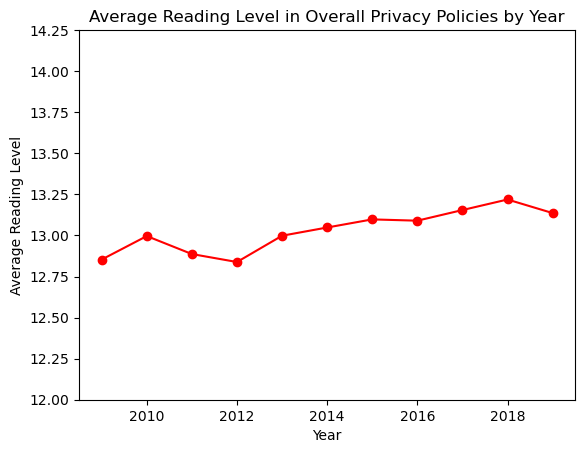

In [6]:
global_min = 12
global_max = 14.25

year = newdf['year']
reading_levels = newdf['flesch_kincaid']
plt.plot(year, reading_levels, marker='o', linestyle= '-', color='r')
  
plt.title('Average Reading Level in Overall Privacy Policies by Year')
plt.xlabel('Year')
plt.ylabel('Average Reading Level')

plt.ylim(global_min, global_max)
plt.show()

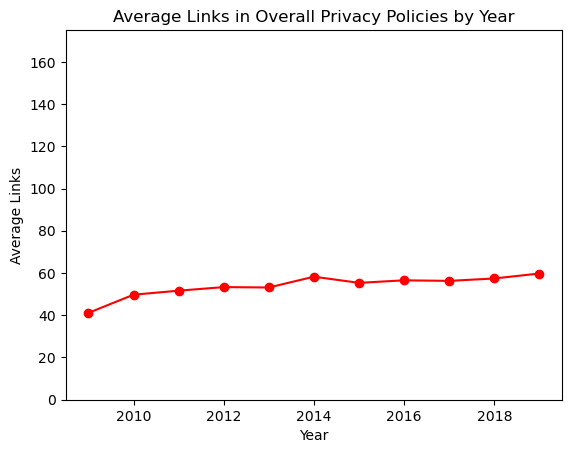

In [5]:
global_min = 0
global_max = 175

year = newdf['year']
counts = newdf['link_count']
plt.plot(year, counts, marker='o', linestyle= '-', color='r')
  
plt.title('Average Links in Overall Privacy Policies by Year')
plt.xlabel('Year')
plt.ylabel('Average Links')

plt.ylim(global_min, global_max)
plt.show()
